# Data Preparation

In [18]:
import numpy as np # linear algebra
import pandas as pd # data manipulation and analysis
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
sns.set_style('whitegrid') # set style for visualization
import warnings # ignore warnings
warnings.filterwarnings('ignore')
import requests, zipfile, io
from sklearn.impute import KNNImputer
import xlrd

In [19]:
# Load the Dataset
df = pd.read_excel('.\data.xls')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [52]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Year
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015


In [20]:
# Understanding Numeric Columns
df.describe()

,Row ID,Order Date,Ship Date,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,55190.379428,229.858001,3.789574,0.156203,28.656896
min,1.000000,2014-01-03 00:00:00,2014-01-07 00:00:00,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2015-05-23 00:00:00,2015-05-27 00:00:00,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2016-06-26 00:00:00,2016-06-29 00:00:00,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2017-05-14 00:00:00,2017-05-18 00:00:00,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2017-12-30 00:00:00,2018-01-05 00:00:00,99301.000000,22638.480000,14.000000,0.800000,8399.976000
std,2885.163629,NaN,NaN,32063.693350,623.245101,2.225110,0.206452,234.260108


In [21]:
# Understanding the Categorical Columns
categorical_df = df.select_dtypes(include=['object', 'category'])

for col in categorical_df.columns:
    print(categorical_df[col].value_counts())
    print()

Order ID
CA-2017-100111    14
CA-2017-157987    12
CA-2016-165330    11
US-2016-108504    11
US-2015-126977    10
                  ..
CA-2014-110422     1
CA-2016-125794     1
CA-2017-163566     1
US-2015-151435     1
CA-2016-130225     1
Name: count, Length: 5009, dtype: int64

Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Customer ID
WB-21850    37
MA-17560    34
JL-15835    34
PP-18955    34
CK-12205    32
            ..
AO-10810     1
LD-16855     1
JR-15700     1
CJ-11875     1
RE-19405     1
Name: count, Length: 793, dtype: int64

Customer Name
William Brown          37
Matt Abelman           34
John Lee               34
Paul Prost             34
Chloris Kastensmidt    32
                       ..
Anthony O'Donnell       1
Lela Donovan            1
Jocasta Rupert          1
Carl Jackson            1
Ricardo Emerson         1
Name: count, Length: 793, dtype: int64

Segment
Consumer       5191
Corpo

In [22]:
# Check for Duplicates
duplicates = df.duplicated()
print("Number of Duplicate Rows:", duplicates.sum())

Number of Duplicate Rows: 0


# Data Visualization with Matplotlib

In [23]:
from plotnine import ggplot, aes, geom_point
import plotly.express as px

In [ ]:
# Create an interactive line chart to show sales trends over the years
# First, Create a Column with only the Year of the Order Date
df['Year'] = df['Order Date'].dt.year

# Create a Dataframe with Sales Aggregated by Year
yearly_sales = df.groupby('Year')['Sales'].sum().reset_index()

# Create Lineplot
fig = px.line(yearly_sales, x='Year', y='Sales')
fig.update_layout(
    title='Sales by Year',        # Adds a plot title
    xaxis_title='Year',           # Label for X axis
    yaxis_title='Sales',           # Label for Y axis
    xaxis=dict(tickmode='linear', dtick=1), # ticks at every integer (no 0.5 years)
    template='plotly_dark'          # Applies a dark visual theme
)
fig.show()

In [ ]:
# Build an interactive map to visualize sales distribution by country
# First, create dataframe that aggregates sales by country
sales = df.groupby('Country')['Sales'].sum().reset_index()

fig = px.choropleth(
    df,
    locations='Country',        # country names
    locationmode='country names',  # Plotly recognizes country names
    color='Sales',              # value to color
    hover_name='Country',       # shows country name on hover
    color_continuous_scale='Blues'
)
fig.show()

# Data Visualization with Seaborn

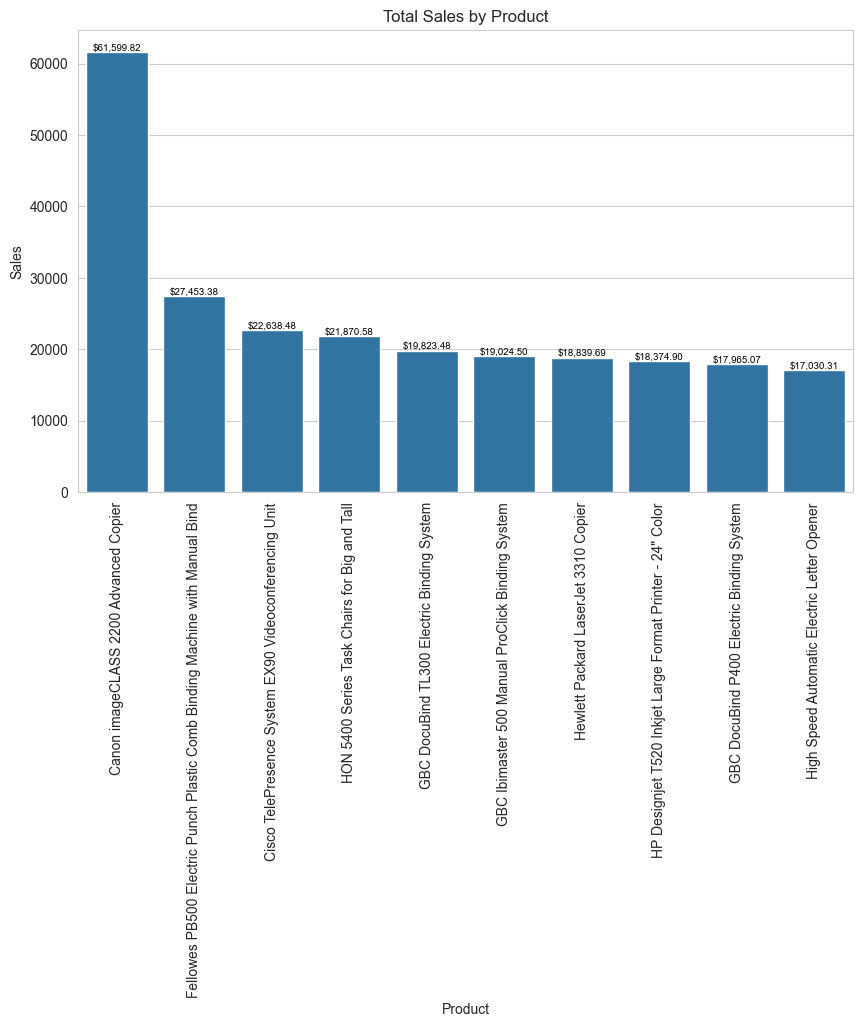

In [68]:
# Use Seaborn to generate a bar chart showing top 10 products by sales
# Aggregate Sales Amount by Product
product_sales = df.groupby('Product Name')['Sales'].sum().reset_index()

# Retrieve only the top 10 products based on sales
top_10 = product_sales.sort_values(by='Sales', ascending=False).head(10).reset_index()

# Plot using Seaborn
plt.figure(figsize=(10,6))
sns.barplot(top_10, x='Product Name', y='Sales')

# Set Labels
for i, val in enumerate(top_10['Sales']):
    plt.text(i, val + max(top_10['Sales'])*0.01, f"${val:,.2f}", ha='center', va='center', fontsize=7, color='black')

plt.title("Total Sales by Product")
plt.xlabel('Product')
plt.ylabel('Sales')
plt.xticks(rotation=90)
plt.show()


In [70]:
# Using Plotly
bar_chart = px.bar(top_10, x='Product Name', y='Sales', title='Sales by Product', width=1000, height=600)
bar_chart.show()

# Comparative Analysis

Plotly is far easier to visualize and locate specific points/values. No need to write an entire line of code to be able to see the labels of each data point. 